In [1]:
import pandas as pd
import math
import os
import rdkit
from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem import Draw
from rdkit.Chem import rdChemReactions
from IPython.display import display
import pandas as pd
from pickle import loads, dumps
from joblib import Memory
import csv
import matplotlib.pyplot as plt
import seaborn as sns
from rdkit.Chem import Descriptors
from rdkit.Chem import Descriptors, Lipinski, Crippen, rdMolDescriptors, GraphDescriptors
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import seaborn as sns

In [2]:
df = pd.read_csv('/home/danylo/Desktop/Master/Data/reactions_descriptors.csv')
df.head()

,ID,ReactionSmiles,Year,Yield,Reagent,Substrate Smiles,Substrate MW,Functional Group,TPSA,MaxAbsPartialCharge,...,NumAromaticCarbocycles,NumAromaticHeterocycles,NumHAcceptors,NumHDonors,NumHeteroatoms,NumRotatableBonds,MolLogP,Chi0n,Chi0v,Chi1
0,ord-234c394584e747f88991f4eb54a4391b,[Cl:1][C:2]1[CH:3]=[C:4]2[C:18](=[CH:19][C:20]...,2010.0,40.0,FS(F)(F)N(CC)CC,CCc1ccc(Cc2cc3c(cc2Cl)CC[C@]32O[C@H](CO)[C@@H]...,418.154702,Primary alcohol,90.15,0.393568,...,2,0,5,4,6,4,2.1085,16.384104,17.140033,13.890214
1,ord-153fcb7da13243ca97daa4572c67d975,[CH:1]1([NH:4][C:5]([C:7]2[N:8]=[N:9][N:10]([C...,2010.0,6.0,FS(F)(F)N(CC)CC,CCNC(=O)c1ccc(-n2nnc(C(=O)NC3CC3)c2CCCO)cc1,357.180090,Primary alcohol,109.14,0.396363,...,1,1,6,3,8,8,0.8341,14.734743,14.734743,12.634560
2,ord-277e80a7f12a45cd8225ad1fcf926b65,[CH:1]1([NH:4][C:5]([C:7]2[N:8]=[N:9][N:10]([C...,2010.0,15.0,FS(F)(F)N(CC)CC,CCNC(=O)c1ccc(-n2cc(C(=O)NC3CC3)nn2)c(OCCCCCCO)c1,415.221954,Primary alcohol,118.37,0.491300,...,1,1,7,3,9,12,1.8407,17.264312,17.264312,14.617724
3,ord-d05ba2f8c5084439a66aaeed37dd4dc6,O[CH2:2][C:3]1([S:6]([NH:9][C:10](=[O:16])[O:1...,2015.0,72.0,FS(F)(F)N(CC)CC,CC(C)(C)OC(=O)NS(=O)(=O)C1(CO)CC1,251.082744,Primary alcohol,92.70,0.443132,...,0,0,5,2,7,3,0.3658,9.609775,10.426272,7.118721
4,ord-ac1523b235154465a7779c49c59c8549,O[CH2:2][CH2:3][NH:4][S:5]([C:8]1[CH:13]=[CH:1...,2015.0,75.0,FS(F)(F)N(CC)CC,COc1ccc2[nH]c(=O)c3sccc3c2c1-c1ccc(S(=O)(=O)NC...,430.065714,Primary alcohol,108.49,0.496088,...,2,2,6,3,9,6,2.6890,15.429719,17.062712,13.957857


769 rows and 25 columns

In [3]:
import pandas as pd

# Assuming df is your DataFrame and 'Reagent' is the column with reagent types
# Load your data if necessary
# df = pd.read_csv('your_data.csv')

# Count the number of different reagents
reagent_counts = df['Reagent'].value_counts()

# Print the counts
print(reagent_counts)


Reagent
FS(F)(F)N(CC)CC                                 528
COCCN(CCOC)S(F)(F)F                              92
C(C(C(C([S](F)(=O)=O)(F)F)(F)F)(F)F)(F)(F)F      38
CCN(CC)CC.F.F.F                                  35
CCCC[N+](CCCC)(CCCC)CCCC.[F-]                    22
F.c1ccncc1                                       19
[B-](F)(F)(F)F.CCN(CC)[S+](F)F                   10
FS(F)(F)N(C)C                                    10
CCN(CC)C(C1=CC=CC(=C1)C)(F)F                      6
CN1CCN(C1(F)F)C                                   3
C1COCCN1S(F)(F)F                                  2
C(C(F)(F)F)(C(F)(F)F)OS(F)(F)F                    2
C(C(C(C([S](Cl)(=O)=O)(F)F)(F)F)(F)F)(F)(F)F      2
Name: count, dtype: int64


In [28]:
import pandas as pd

# Assuming df is your DataFrame and 'Reagent' is the column with reagent types
# Load your data if necessary
# df = pd.read_csv('your_data.csv')

# Calculate the mean Yield for each type of Reagent
mean_yields_by_reagent = df.groupby('Reagent')['Yield'].mean()

# Print the mean Yields
print(mean_yields_by_reagent)


Reagent
C(C(C(C([S](Cl)(=O)=O)(F)F)(F)F)(F)F)(F)(F)F    46.400002
C(C(C(C([S](F)(=O)=O)(F)F)(F)F)(F)F)(F)(F)F     49.463158
C(C(F)(F)F)(C(F)(F)F)OS(F)(F)F                  76.000000
C1COCCN1S(F)(F)F                                41.950001
CCCC[N+](CCCC)(CCCC)CCCC.[F-]                   60.722727
CCN(CC)C(C1=CC=CC(=C1)C)(F)F                    73.000000
CCN(CC)CC.F.F.F                                 49.480000
CN1CCN(C1(F)F)C                                 28.800001
COCCN(CCOC)S(F)(F)F                             57.545652
F.c1ccncc1                                      56.231579
FS(F)(F)N(C)C                                   60.680000
FS(F)(F)N(CC)CC                                 50.947292
[B-](F)(F)(F)F.CCN(CC)[S+](F)F                  37.590001
Name: Yield, dtype: float64


In [4]:
import pandas as pd
from scipy.stats import ttest_ind
from itertools import combinations

# Assuming df is your DataFrame and 'Reagent' is the column with reagent types
# Load your data if necessary
# df = pd.read_csv('your_data.csv')

# Get all unique reagents
unique_reagents = df['Reagent'].unique()

# Initialize a list to store results
t_test_results = []

# Perform t-tests between all pairs of reagents
for reagent1, reagent2 in combinations(unique_reagents, 2):
    # Filter data for both reagents
    data1 = df[df['Reagent'] == reagent1]['Yield']
    data2 = df[df['Reagent'] == reagent2]['Yield']
    
    # Perform t-test
    t_stat, p_value = ttest_ind(data1, data2, equal_var=False, nan_policy='omit')  # Welch's t-test
    t_test_results.append({
        'Reagent1': reagent1,
        'Reagent2': reagent2,
        't-statistic': t_stat,
        'p-value': p_value
    })

# Convert the list of results into a DataFrame
results_df = pd.DataFrame(t_test_results)
results_df.head()


/home/danylo/anaconda3/envs/master_USPTO/lib/python3.12/site-packages/scipy/stats/_axis_nan_policy.py:531: RuntimeWarning: Precision loss occurred in moment calculation due to catastrophic cancellation. This occurs when the data are nearly identical. Results may be unreliable.
  res = hypotest_fun_out(*samples, **kwds)


,Reagent1,Reagent2,t-statistic,p-value
0,FS(F)(F)N(CC)CC,COCCN(CCOC)S(F)(F)F,-2.804496,0.005723
1,FS(F)(F)N(CC)CC,[B-](F)(F)(F)F.CCN(CC)[S+](F)F,1.577738,0.147960
2,FS(F)(F)N(CC)CC,C(C(C(C([S](F)(=O)=O)(F)F)(F)F)(F)F)(F)(F)F,0.315339,0.754090
3,FS(F)(F)N(CC)CC,CCN(CC)CC.F.F.F,0.324274,0.747492
4,FS(F)(F)N(CC)CC,CCCC[N+](CCCC)(CCCC)CCCC.[F-],-2.777700,0.010074


In [5]:
import pandas as pd

# Assuming results_df is the DataFrame from the previous code snippet that contains the t-test results

# Filter to find only significant results (p-value < 0.05)
significant_results = results_df[results_df['p-value'] < 0.05]

# Print the significant results
significant_results.shape


(23, 4)

In [6]:
mean_values = df.describe().loc['mean']

In [7]:
mean_values


Year                        2009.932380
Yield                         52.075254
Substrate MW                 353.753035
TPSA                          68.571599
MaxAbsPartialCharge            0.435392
MaxPartialCharge               0.304565
MinAbsPartialCharge            0.295624
MinPartialCharge              -0.426451
FractionCSP3                   0.467448
NumAliphaticCarbocycles        0.234070
NumAliphaticHeterocycles       0.703511
NumAromaticCarbocycles         1.118336
NumAromaticHeterocycles        0.641092
NumHAcceptors                  4.674902
NumHDonors                     1.276983
NumHeteroatoms                 6.699610
NumRotatableBonds              4.631990
MolLogP                        2.933804
Chi0n                         13.950917
Chi0v                         14.441038
Chi1                          11.603339
Name: mean, dtype: float64

In [8]:
features = [
    "TPSA", 
    "MaxAbsPartialCharge",
    "MaxPartialCharge",
    "MinAbsPartialCharge",
    "MinPartialCharge",
    "FractionCSP3",
    "NumAliphaticCarbocycles",
    "NumAliphaticHeterocycles",
    "NumAromaticCarbocycles",
    "NumAromaticHeterocycles",
    "NumHAcceptors",
    "NumHDonors",
    "NumHeteroatoms",
    "NumRotatableBonds",
    "MolLogP",
    "Chi0n",
    "Yield"
]


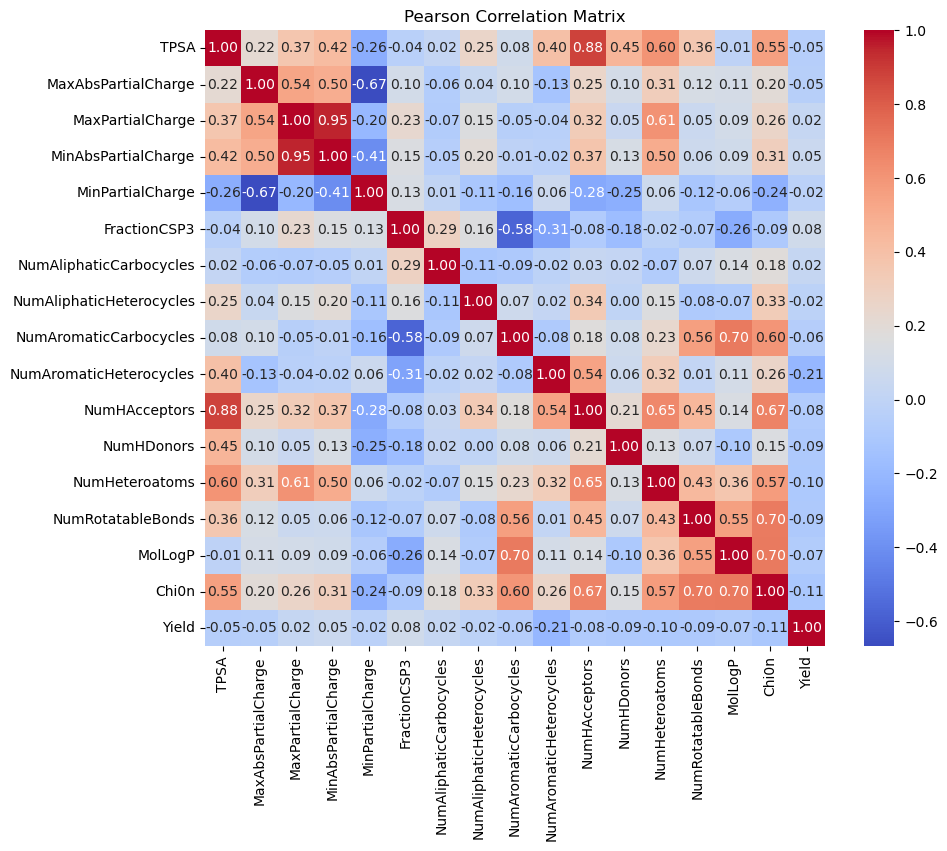

In [9]:
correlation_matrix = df[features].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Pearson Correlation Matrix')
plt.show()

In [10]:
import pandas as pd
from scipy.stats import ttest_ind

# Example DataFrame loading
# df = pd.read_csv('your_data.csv')

# Define the groups to compare
group1 = df[df['Reagent'] == 'COCCN(CCOC)S(F)(F)F']
group2 = df[df['Reagent'] == 'FS(F)(F)N(CC)CC']

# List of descriptors for which to perform t-tests
features = [
    "TPSA", "MaxAbsPartialCharge", "MaxPartialCharge", "MinAbsPartialCharge",
    "MinPartialCharge", "FractionCSP3", "NumAliphaticCarbocycles",
    "NumAliphaticHeterocycles", "NumAromaticCarbocycles", "NumAromaticHeterocycles",
    "NumHAcceptors", "NumHDonors", "NumHeteroatoms", "NumRotatableBonds",
    "MolLogP", "Chi0n", "Yield"
]

# Initialize a dictionary to store t-test results
t_test_results = {}

# Perform t-tests
for feature in features:
    stat, p_value = ttest_ind(group1[feature], group2[feature], equal_var=False)  # Welch's t-test
    t_test_results[feature] = {'t-statistic': stat, 'p-value': p_value}

# Convert results to DataFrame for better visualization
results_df = pd.DataFrame(t_test_results).T
print(results_df)


                          t-statistic   p-value
TPSA                         1.437833  0.153044
MaxAbsPartialCharge          2.079925  0.039655
MaxPartialCharge             1.853951  0.066221
MinAbsPartialCharge          1.596982  0.112846
MinPartialCharge            -1.147643  0.253135
FractionCSP3                -1.065159  0.288732
NumAliphaticCarbocycles      0.815553  0.416228
NumAliphaticHeterocycles     1.323604  0.188052
NumAromaticCarbocycles      -0.262319  0.793419
NumAromaticHeterocycles      2.397677  0.018067
NumHAcceptors                1.325225  0.187665
NumHDonors                  -0.176822  0.859879
NumHeteroatoms               0.091344  0.927358
NumRotatableBonds           -3.513032  0.000564
MolLogP                      0.672691  0.502132
Chi0n                        0.611502  0.541846
Yield                        2.804496  0.005723


In [12]:
from itertools import combinations
from scipy.stats import ttest_ind

# Exclude the "Year" column and identify numeric columns
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns.difference(['Year'])

# Get the unique functional groups
functional_groups = df['Functional Group'].unique()

# Create a dictionary to store significant results (p-value < 0.05)
significant_results = {col: [] for col in numeric_cols}

# Perform pairwise t-tests between all pairs of functional groups
for col in numeric_cols:
    for group1, group2 in combinations(functional_groups, 2):
        # Get data for each group
        group1_data = df[df['Functional Group'] == group1][col]
        group2_data = df[df['Functional Group'] == group2][col]

        # Perform t-test
        t_stat, p_val = ttest_ind(group1_data, group2_data, equal_var=False)  # Welch's t-test

        # Store if the p-value is below 0.05
        if p_val < 0.05:
            significant_results[col].append((group1, group2, p_val))

# Filter out empty results
significant_results = {col: results for col, results in significant_results.items() if results}

# Display results
significant_results



{'FractionCSP3': [('Primary alcohol',
   'Secondary alcohol',
   0.04175519573165991),
  ('Primary alcohol', 'Tertiary alcohol', 2.635874995649544e-07),
  ('Secondary alcohol', 'Tertiary alcohol', 0.0018496528399176326)],
 'MaxAbsPartialCharge': [('Primary alcohol',
   'Secondary alcohol',
   5.110479362730626e-14),
  ('Primary alcohol', 'Tertiary alcohol', 0.0051280770547060366),
  ('Secondary alcohol', 'Tertiary alcohol', 0.00027773974689164417)],
 'MaxPartialCharge': [('Primary alcohol',
   'Secondary alcohol',
   9.642182420682336e-11),
  ('Primary alcohol', 'Tertiary alcohol', 0.004675169075923802),
  ('Secondary alcohol', 'Tertiary alcohol', 0.006103889086456664)],
 'MinAbsPartialCharge': [('Primary alcohol',
   'Secondary alcohol',
   1.8624930990905882e-11),
  ('Primary alcohol', 'Tertiary alcohol', 0.0004584359275093644),
  ('Secondary alcohol', 'Tertiary alcohol', 0.028111540761874994)],
 'MinPartialCharge': [('Primary alcohol',
   'Secondary alcohol',
   5.231337761431332e-0

In [15]:
# Create yield ranges (bins) and assign each row to a range
yield_bins = [0, 50, 70, 90, 100]
yield_labels = ['0-50%', '51-70%', '71-90%', '91-100%']
df['Yield Range'] = pd.cut(df['Yield'], bins=yield_bins, labels=yield_labels)

# Get the unique yield ranges
yield_ranges = df['Yield Range'].unique()

# Initialize a dictionary for significant results (p-value < 0.05)
significant_yield_results = {col: [] for col in numeric_cols}

# Perform t-tests between pairs of yield ranges for each numeric variable
for col in numeric_cols:
    for range1, range2 in combinations(yield_ranges, 2):
        # Extract data for each yield range
        range1_data = df[df['Yield Range'] == range1][col]
        range2_data = df[df['Yield Range'] == range2][col]

        # Perform t-test
        t_stat, p_val = ttest_ind(range1_data, range2_data, equal_var=False)  # Welch's t-test

        # Store if the p-value is below 0.05
        if p_val < 0.05:
            significant_yield_results[col].append((range1, range2, p_val))

# Remove empty results
significant_yield_results = {col: results for col, results in significant_yield_results.items() if results}

# Compute Pearson correlation coefficients between numeric variables and yield percentage
pearson_correlation = df[numeric_cols].corrwith(df['Yield'])

# Display results
significant_yield_results, pearson_correlation



({'Chi0n': [('0-50%', '71-90%', 0.005312761745464905),
   ('0-50%', '51-70%', 3.1097707339019354e-06),
   ('0-50%', '91-100%', 0.00531432293642904)],
  'Chi0v': [('0-50%', '71-90%', 0.020302416745627157),
   ('0-50%', '51-70%', 9.456121308394383e-06),
   ('0-50%', '91-100%', 0.009572994654708513)],
  'Chi1': [('0-50%', '71-90%', 0.0023823473738253647),
   ('0-50%', '51-70%', 4.3717433464672754e-07),
   ('0-50%', '91-100%', 0.0004590870992013547)],
  'FractionCSP3': [('0-50%', '91-100%', 0.0022074489434125394),
   ('71-90%', '91-100%', 0.0362052274465373),
   ('51-70%', '91-100%', 0.021830100061018837)],
  'MaxAbsPartialCharge': [('71-90%', '91-100%', 0.03812454022947452)],
  'MaxPartialCharge': [('0-50%', '51-70%', 0.03408053085838351)],
  'MinAbsPartialCharge': [('51-70%', '91-100%', 0.03835130448483899)],
  'MinPartialCharge': [('0-50%', '91-100%', 0.00951160679574766),
   ('71-90%', '91-100%', 0.016377535707678092),
   ('51-70%', '91-100%', 0.036482181494617356)],
  'MolLogP': [('0-

In [16]:
features_yield = significant_yield_results.keys()
features_subtrates  = significant_results.keys()

In [37]:
print(features_yield)

dict_keys(['Chi0n', 'Chi0v', 'Chi1', 'FractionCSP3', 'MaxAbsPartialCharge', 'MaxPartialCharge', 'MinAbsPartialCharge', 'MinPartialCharge', 'MolLogP', 'NumAliphaticCarbocycles', 'NumAromaticCarbocycles', 'NumAromaticHeterocycles', 'NumHAcceptors', 'NumHDonors', 'NumHeteroatoms', 'NumRotatableBonds', 'Substrate MW', 'Yield'])


In [17]:
len(features_yield)

18

In [18]:
len(features_subtrates)

12

Text(0.5, 1.0, 'PCA of Significant Features')

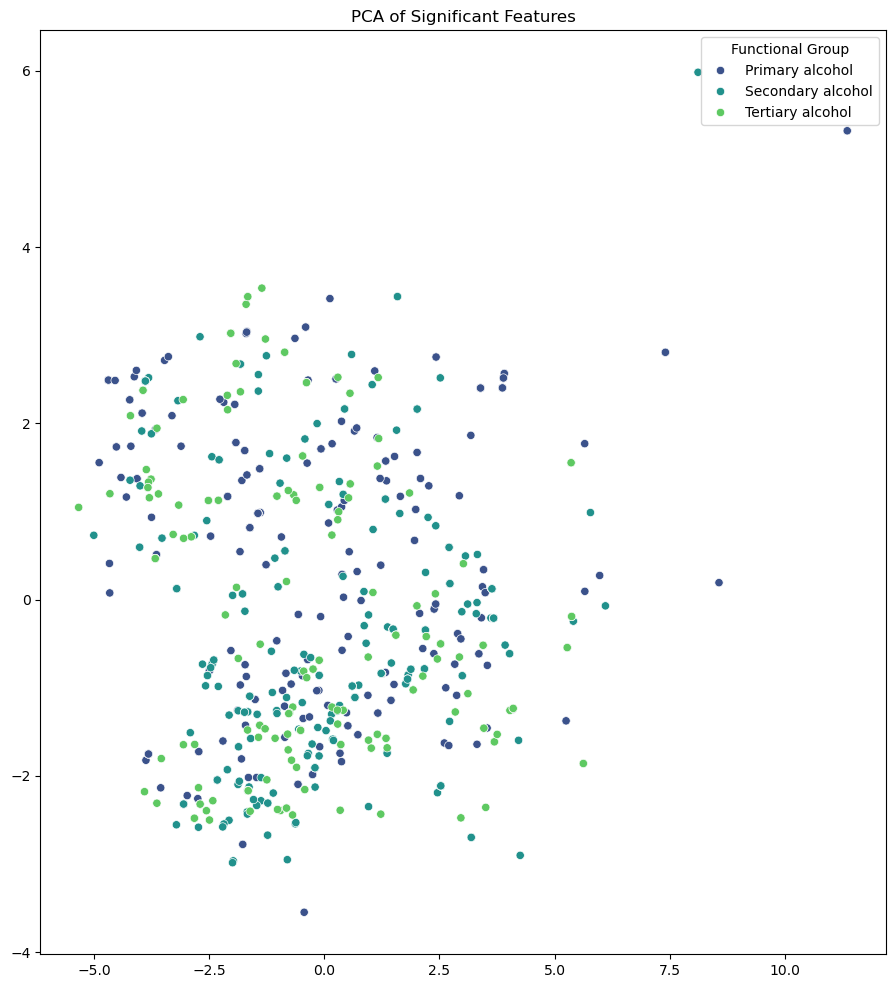

In [25]:

# Filter your DataFrame to include only significant features
df_significant = df[features_yield]

# Standardizing the data
scaler = StandardScaler()
df_standardized = scaler.fit_transform(df_significant)

# PCA
pca = PCA(n_components=2)
pca_results = pca.fit_transform(df_standardized)
plt.figure(figsize=(24, 12))
plt.subplot(1, 2, 1)
sns.scatterplot(x=pca_results[:, 0], y=pca_results[:, 1], hue=df['Functional Group'], palette='viridis')
plt.title('PCA of Significant Features')


/tmp/ipykernel_4906/309915832.py:14: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.scatterplot(


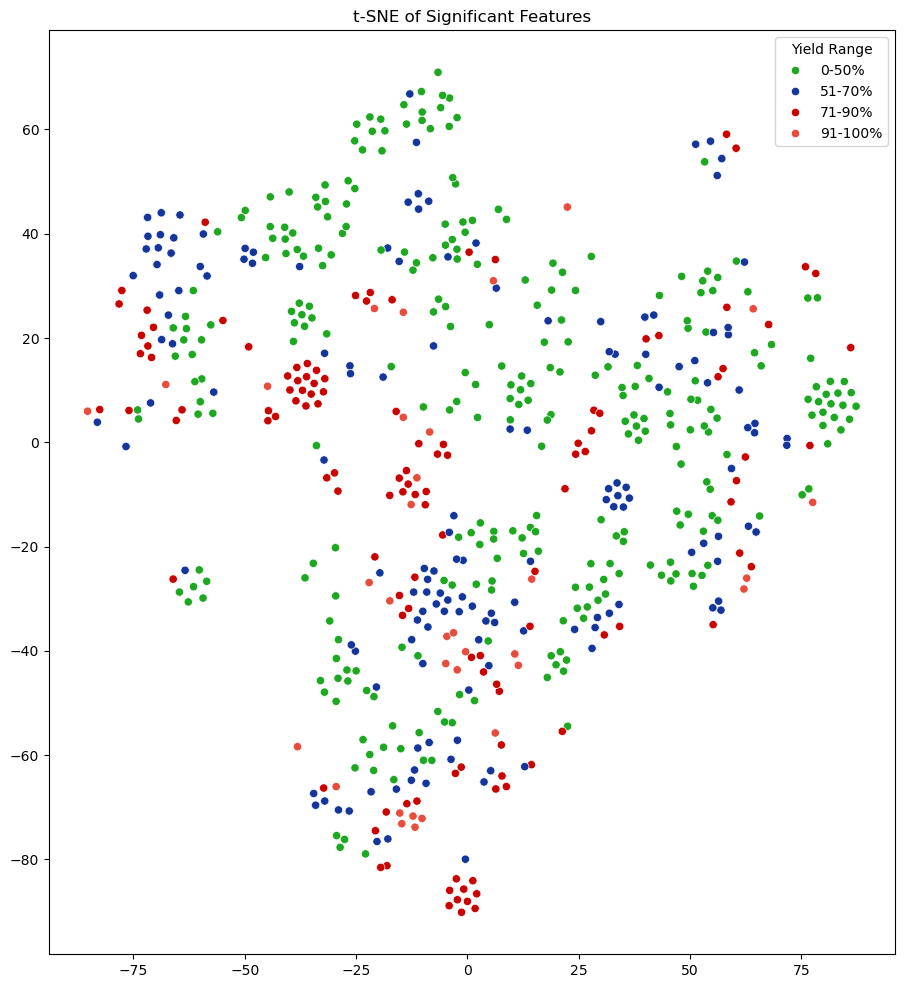

In [33]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

# t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_standardized)
custom_palette = sns.color_palette(["#1ea822", "#14369b", "#c90300", "#e74c3c", "#34495e", "#2ecc71"])
plt.figure(figsize=(24, 12))
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=tsne_results[:, 0], 
    y=tsne_results[:, 1], 
    hue=df['Yield Range'], 
    palette=custom_palette
)
plt.title('t-SNE of Significant Features')
plt.show()

In [23]:

df_significant_subtrates = df[features_subtrates]
df_standardized_substrates = scaler.fit_transform(df_significant_subtrates)

/tmp/ipykernel_4906/1028375957.py:16: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.scatterplot(


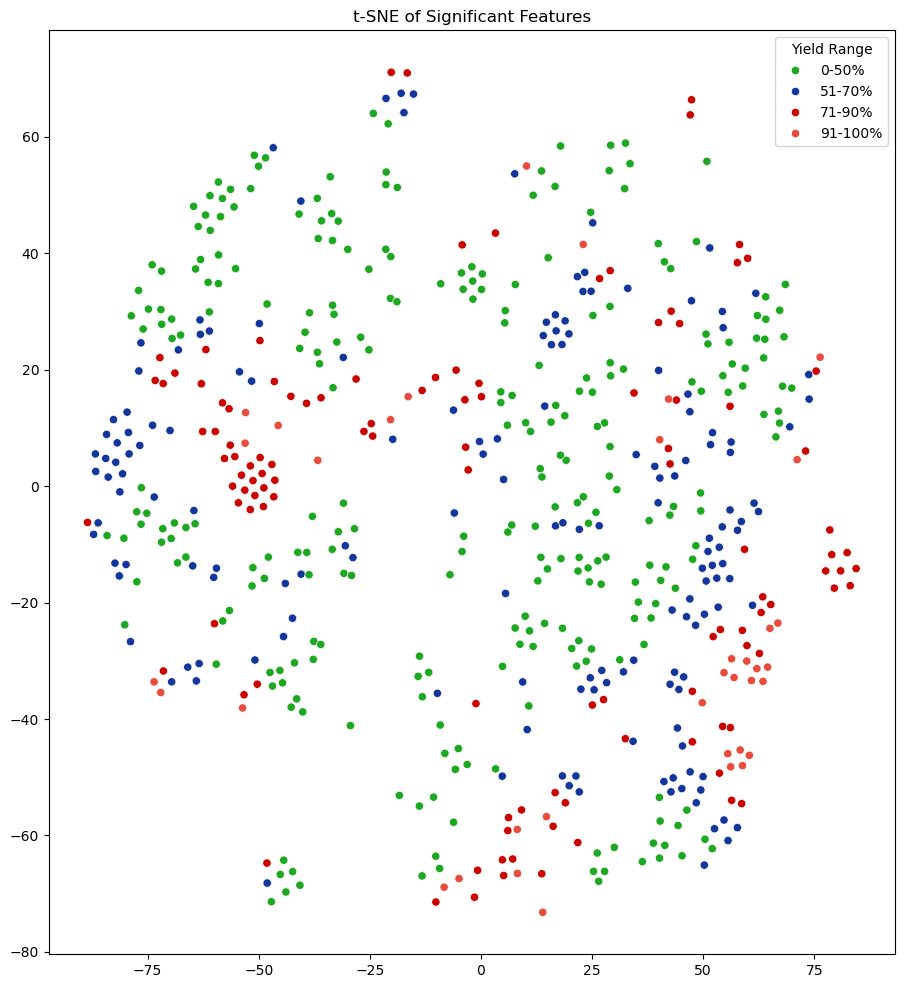

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

# Assuming df_standardized_substrates is your data prepared for t-SNE
tsne = TSNE(n_components=2, random_state=42)
tsne_results = tsne.fit_transform(df_standardized_substrates)

# Define a custom palette
# Map functional groups to marker styles
custom_palette = sns.color_palette(["#1ea822", "#14369b", "#c90300", "#e74c3c", "#34495e", "#2ecc71"])
# Adjust colors as needed to suit the number of your groups

plt.figure(figsize=(24, 12))
plt.subplot(1, 2, 2)
sns.scatterplot(
    x=tsne_results[:, 0], 
    y=tsne_results[:, 1], 
    hue=df['Yield Range'], 
    palette=custom_palette
)
plt.title('t-SNE of Significant Features')
plt.show()

In [38]:
import plotly.express as px

# Assume 'tsne_results' is your t-SNE results array and 'df' is your original DataFrame
# Add t-SNE results to your DataFrame for easier plotting
df['t-SNE-1'] = tsne_results[:, 0]
df['t-SNE-2'] = tsne_results[:, 1]

# Define what you want to show in the hover data
hover_data = {
    'Index': df.index,
    'Yield': df['Yield'],  # Assuming 'Yield' is a column in your df
    # Add more data columns as needed
}

# Create an interactive scatter plot
fig = px.scatter(
    df, 
    x='t-SNE-1', 
    y='t-SNE-2',
    color='Functional Group',  # Assuming this is a column in your df
    hover_data=hover_data,
    title='Interactive t-SNE of Significant Features',
    color_continuous_scale=px.colors.sequential.Viridis  # or any other color scale
)

# Show the plot
fig.show()


ValueError: Ambiguous input: values for 'Yield' appear both in hover_data and data_frame